In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import time

import batt_cycle

In [19]:
# import and clean data
start_time = time.time()
raw_data = '../Data/LSB/5_21_19/_005_3.xls'
# imports and concatenates the data for a cell
old_A_0 = batt_cycle.import_data(raw_data, 1)
# cleans and preps dataframes
old_A, old_A_break = batt_cycle.clean_prep_break_batt(old_A_0)
# reshapes the index data
old_A_indeces = batt_cycle.reshape_cycle_indeces(old_A, old_A_break)
# combine data and indeces for pickling
old_A_data = [old_A, old_A_indeces]
pickle.dump(old_A_data, open('../Data/LSB/old_B_data.pickle', 'wb'))
print("--- %s seconds ---" % (time.time() - start_time))

Number of Cycles = 1
--- 1.4750189781188965 seconds ---


In [20]:
# import and clean data
start_time = time.time()
raw_data = '../Data/LSB/5_21_19/_006_5.xls'
# imports and concatenates the data for a cell
new_A_0 = batt_cycle.import_data(raw_data, 1)
# cleans and preps dataframes
new_A, new_A_break = batt_cycle.clean_prep_break_batt(new_A_0)
# reshapes the index data
new_A_indeces = batt_cycle.reshape_cycle_indeces(new_A, new_A_break)
# combine data and indeces for pickling
new_A_data = [new_A, new_A_indeces]
pickle.dump(new_A_data, open('../Data/LSB/new_B_data.pickle', 'wb'))
print("--- %s seconds ---" % (time.time() - start_time))

Number of Cycles = 1
--- 1.4359562397003174 seconds ---


In [27]:
# import and clean data
start_time = time.time()
raw_data = '../Data/LSB/5_21_19/_008_6.xls'
# imports and concatenates the data for a cell
oe_A_0 = batt_cycle.import_data(raw_data, 1)
# cleans and preps dataframes
oe_A, oe_A_break = batt_cycle.clean_prep_break_batt(oe_A_0)
# reshapes the index data
oe_A_indeces = batt_cycle.reshape_cycle_indeces(oe_A, oe_A_break)
# combine data and indeces for pickling
oe_A_data = [oe_A, oe_A_indeces]
pickle.dump(oe_A_data, open('../Data/LSB/oe_B_data.pickle', 'wb'))
print("--- %s seconds ---" % (time.time() - start_time))

Number of Cycles = 1
--- 1.377305030822754 seconds ---


In [38]:
# open old_A
data_file = '../Data/LSB/old_A_data.pickle'
sample_data1 = pickle.load(open(data_file, 'rb'))
sample1, sample_indeces1 = sample_data1
sample1['time_hours'] = sample1['time_sec']/3600

# open new_A
data_file = '../Data/LSB/new_A_data.pickle'
sample_data2 = pickle.load(open(data_file, 'rb'))
sample2, sample_indeces2 = sample_data2
sample2['time_hours'] = sample2['time_sec']/3600

# open oe_A
data_file = '../Data/LSB/oe_A_data.pickle'
sample_data3 = pickle.load(open(data_file, 'rb'))
sample3, sample_indeces3 = sample_data3
sample3['time_hours'] = sample3['time_sec']/3600

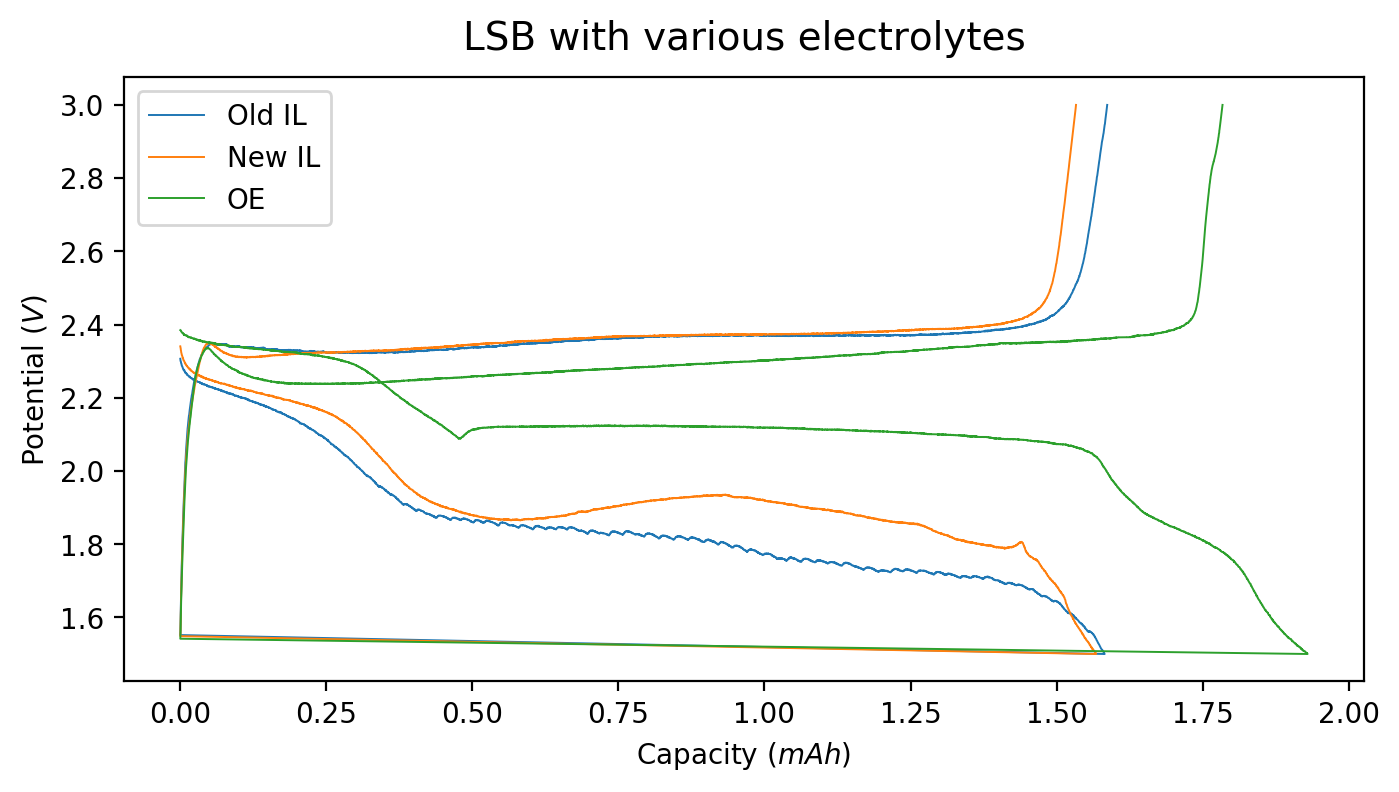

In [41]:
# plotting a cycle range
start_cycle = 1
end_cycle = 1

range_data1, label1 = batt_cycle.cycle_range_data(sample1, sample_indeces1, start_cycle, end_cycle)
range_data2, label2 = batt_cycle.cycle_range_data(sample2, sample_indeces2, start_cycle, end_cycle)
range_data3, label3 = batt_cycle.cycle_range_data(sample3, sample_indeces3, start_cycle, end_cycle)

fig = plt.figure(figsize=(8,4), dpi=200)
ax = fig.add_subplot(111)
ax.set_title('LSB with various electrolytes', fontsize=14, pad=10)
ax.set_xlabel('Capacity ($mAh$)')
ax.set_ylabel('Potential ($V$)')
# ax.set_ylim(-0.5, 0.5)
# ax.set_ylim(-abs(max(range_data['voltage'], key=abs)*1.2),
#          abs(max(range_data['voltage'], key=abs)*1.2))
# ax.set_xlim(min(range_data['time_hours']), max(range_data['time_hours']))
# ax.yaxis.grid(True)
# ax.text(0.15, 0.15, '0.2 $mA$ $cm^{-2}$, Li(G4)TFSI', transform=fig.transFigure, fontsize=12)

ax.plot(range_data1['capacity'], range_data1['voltage'], linewidth=0.7, label='Old IL')
ax.plot(range_data2['capacity'], range_data2['voltage'], linewidth=0.7, label='New IL')
ax.plot(range_data3['capacity'], range_data3['voltage'], linewidth=0.7, label='OE')

ax.legend()
# filename = '{} - '.format(data_file[27:-12])+label+'.png'
# plt.savefig('./Figures/'+filename)
